In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set_style('whitegrid')
%matplotlib inline

# Dataset Load

In [9]:
df_train_path = os.path.join("train.csv")
df_test_path = os.path.join("test.csv")
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

In [10]:
# Let's make the passengerID the index of df just for organization issues....
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

In [11]:
# Keep it for future rearrangements
df_train_origin = df_train.copy()
df_test_origin = df_test.copy()

# 4 C's of Data

In [12]:
print(df_train.info())
print("//--------------//-----------//")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
//--------------//-----------//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2),

** Correcting **

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


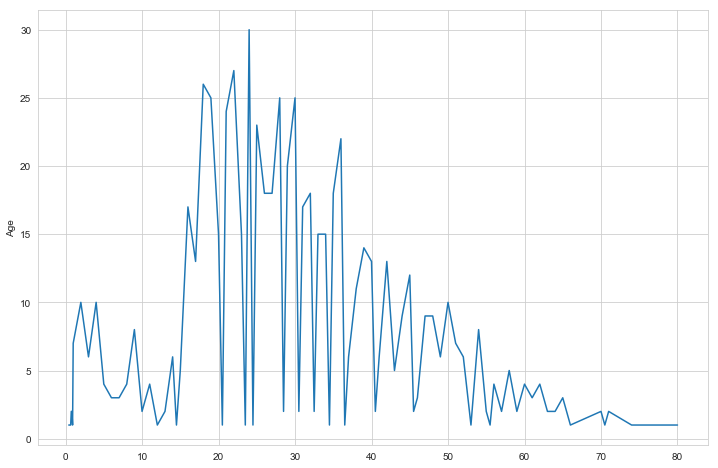

In [13]:
plt.figure(figsize=(12,8))
print(df_train['Age'].value_counts())
sns.lineplot(x=df_train['Age'].value_counts().index, y=df_train['Age'].value_counts(), data=df_train)
# the entire age set of training data is valid (> 0 and < 80 are reasonable values.)

24.00    17
21.00    17
22.00    16
30.00    15
18.00    13
27.00    12
26.00    12
25.00    11
23.00    11
29.00    10
36.00     9
45.00     9
20.00     8
17.00     7
28.00     7
32.00     6
31.00     6
55.00     6
33.00     6
39.00     6
35.00     5
41.00     5
47.00     5
40.00     5
50.00     5
42.00     5
48.00     5
19.00     4
43.00     4
1.00      3
         ..
8.00      2
63.00     2
14.00     2
22.50     1
62.00     1
0.83      1
67.00     1
28.50     1
0.33      1
0.17      1
38.50     1
3.00      1
51.00     1
5.00      1
44.00     1
14.50     1
59.00     1
58.00     1
0.75      1
0.92      1
36.50     1
40.50     1
11.50     1
34.00     1
15.00     1
7.00      1
60.50     1
26.50     1
76.00     1
34.50     1
Name: Age, Length: 79, dtype: int64


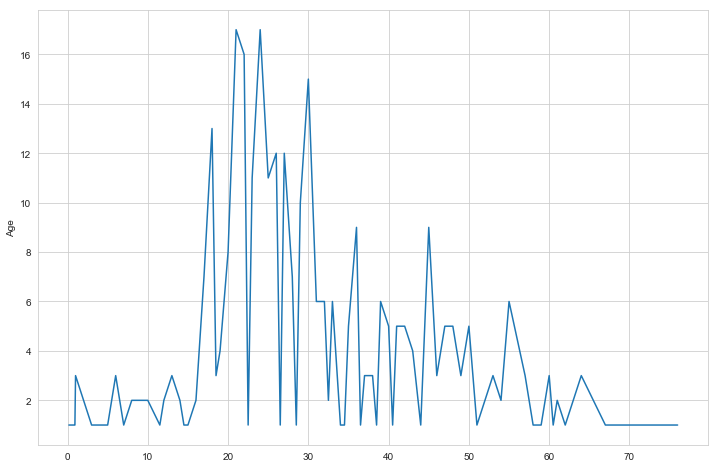

In [14]:
plt.figure(figsize=(12,8))
print(df_test['Age'].value_counts())
sns.lineplot(x=df_test['Age'].value_counts().index, y=df_test['Age'].value_counts(), data=df_test)
# The test 

In [15]:
# Pclass values seems ok
print(df_train['Pclass'].value_counts())
print('======================================')
print(df_test['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    218
1    107
2     93
Name: Pclass, dtype: int64


In [16]:
# Sex values seems ok
print(df_train['Sex'].value_counts())
print('======================================')
print(df_test['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64


In [17]:
# SibSp values seems ok
print(df_train['SibSp'].value_counts())
print('======================================')
print(df_test['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


In [18]:
# Number of Parch seems ok (although 9 people seems scary)
print(df_train['Parch'].value_counts())
print('======================================')
print(df_test['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


In [19]:
# Number of Parch seems ok (although 9 people seems scary)
print(df_train['Embarked'].value_counts())
print('======================================')
print(df_test['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64


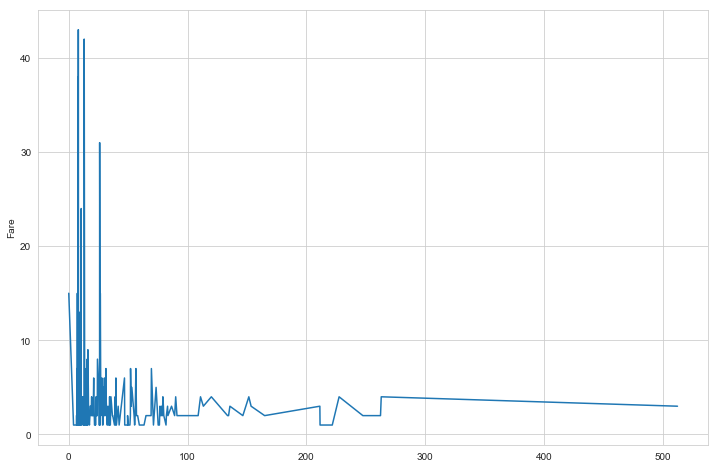

In [20]:
plt.figure(figsize=(12,8))
print(df_train['Fare'].value_counts())
sns.lineplot(x=df_train['Fare'].value_counts().index, y=df_train['Fare'].value_counts(), data=df_train)
# There is some people that paid a lot for the trip. is this real?
# Let's see the occurences of top 10 fares.

In [21]:
df_train.sort_values('Fare', ascending=False).head(10)
# seems ok, all the classes are 1'st which indicates true in these values.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
10.5000     11
7.7750      10
7.2292       9
7.2250       9
8.6625       8
7.8542       8
21.0000      8
26.5500      7
7.8792       6
27.7208      6
7.2500       5
7.9250       5
262.3750     5
211.5000     4
69.5500      4
14.5000      4
7.5500       4
7.7958       4
15.2458      4
55.4417      3
31.3875      3
31.5000      3
14.4542      3
9.5000       3
221.7792     3
            ..
50.4958      1
39.4000      1
34.3750      1
7.7208       1
7.8500       1
76.2917      1
7.7250       1
9.2250       1
39.6875      1
75.2500      1
13.8625      1
6.9500       1
61.1750      1
78.8500      1
20.2125      1
247.5208     1
7.5750       1
28.5375      1
227.5250     1
108.9000     1
6.4958       1
7.6292       1
47.1000      1
22.3583      1
17.4000      1
9.3250       1
14.4583      1
15.0333      1
25.4667      1
21.0750      1
Name: Fare, Length: 169, dtype: int64


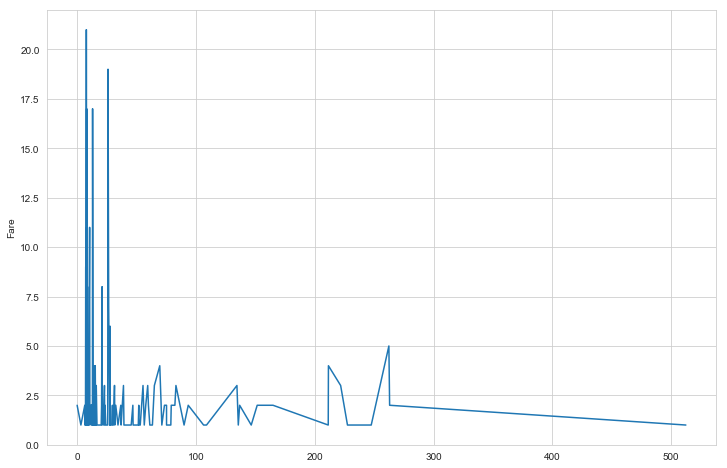

In [22]:
plt.figure(figsize=(12,8))
print(df_test['Fare'].value_counts())
sns.lineplot(x=df_test['Fare'].value_counts().index, y=df_test['Fare'].value_counts(), data=df_test)
# Same behavior as seen before.
# Let's evaluate the top 10.

In [23]:
df_test.sort_values('Fare', ascending=False).head(10)
# also seems ok, all the classes are 1'st which indicates true in these values.

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C
1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C


** Completing **

In [24]:
# Age has some missing values both in train and test df.
# let's fill with mean + a random value in the interval -std,+std
df_train['Age'].fillna(pd.concat([df_train, df_test])['Age'].median(), inplace=True)
df_test['Age'].fillna(pd.concat([df_train, df_test])['Age'].median(), inplace=True)

In [25]:
# Let's try to use this information somehow and replace the NA's by a dummy value.
df_train['Cabin'].fillna('X', inplace=True)
df_test['Cabin'].fillna('X', inplace=True)

In [26]:
print(pd.concat([df_train['Embarked'], df_test['Embarked']]).value_counts())
# S is the most common, so let's fill it
df_train['Embarked'].fillna('S', inplace=True)

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [27]:
# Fare has one missing value in test df.
# Let's make it equal to the median of the entire DS.
df_test['Fare'].fillna(pd.concat([df_train, df_test])['Fare'].median(), inplace=True)

** Creating - Feature Enginnering **

In [28]:
print(df_train.info())
print("//--------------//-----------//")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
//--------------//-----------//
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2)

In [29]:
# Let's find out which values we can consider ints instead of floats.
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [30]:
df_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500
Age,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838
SibSp,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000


In [31]:
# Since we have 0-80, let's make 5 splits
def parse_age_to_cat(age):
    if age > 60:
        return 'Elder'
    elif age > 48:
        return 'Mature'
    elif age > 32:
        return 'Adult'
    elif age > 16:
        return 'Young_adult'
    elif age > 8:
        return 'Child'
    else:
        return 'Infant'

In [32]:
# According to corr, age has low correlation with survived.
# How can we represent it better (in a way that this correlates more)?
df_train['Cat_Age'] = df_train['Age'].apply(parse_age_to_cat)
df_test['Cat_Age'] = df_test['Age'].apply(parse_age_to_cat)

In [33]:
def parse_family_sz(family_sz):
    if family_sz > 6:
        return 'Huge'
    elif family_sz > 4:
        return 'Big'
    elif family_sz > 2:
        return 'Medium'
    elif family_sz >= 1:
        return 'Small'
    else:
        return 'Single'

In [34]:
# Same goes for SibSp and Parch
# Let's make pretty simple to create a new column
df_train['Family_sz'] = df_train['SibSp'] + df_train['Parch']
df_train['Family_sz_cat'] = df_train['Family_sz'].apply(parse_family_sz)

df_test['Family_sz'] = df_test['SibSp'] + df_test['Parch']
df_test['Family_sz_cat'] = df_test['Family_sz'].apply(parse_family_sz)

In [35]:
def extract_ticket_prefix(tick):
    regex = re.compile('([A-Za-z.\/0-9]*) ')
    res = regex.search(tick)
    if res != None:
        return res.group(1)
    else:
        return 'X'

In [36]:
# About the tickets, the number probably doesn't relate with survivability.
# But Maybe the prefix could say something. Let's try to parse it
df_train['Ticket_Prefix'] = df_train['Ticket'].apply(extract_ticket_prefix)
df_test['Ticket_Prefix'] = df_test['Ticket'].apply(extract_ticket_prefix)

In [37]:
def parse_fare(fare):
    if fare > 200:
        return 'Absurd'
    elif fare > 100:
        return 'Overexpensive'
    elif fare > 80:
        return 'Expensive'
    elif fare > 32.2:
        return 'Abv_Mean'
    elif fare > 31:
        return 'Mean'
    else:
        return 'Cheap'

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


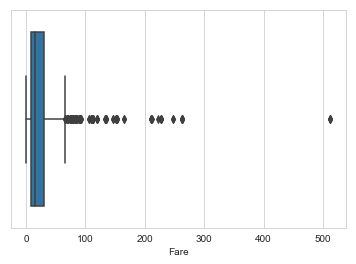

In [38]:
#Let's try to make fare more useful too
print(df_train['Fare'].describe())
sns.boxplot(df_train['Fare'] )
df_train['Paid_Amount'] = df_train['Fare'].apply(parse_fare)
df_test['Paid_Amount'] = df_test['Fare'].apply(parse_fare)

In [61]:
def parse_title(name):
    reg = re.compile('[A-Za-z \']*, ([A-Za-z ]+)*')
    res = reg.search(name)
    return res.group(1)

In [63]:
# The title in the name can say something about survivability.
df_train['Title'] = df_train['Name'].apply(parse_title)
df_test['Title'] = df_test['Name'].apply(parse_title)

In [64]:
print(df_train.shape)
print(df_test.shape)

(891, 17)
(418, 16)


# Exploratory Analysis

In [66]:
#Let's start removing stuff that we will not use.
df_train.head()
# we will use just the title
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

# We have a kind of categorical age
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

# We have this fields addressed as family sz
df_train.drop('SibSp', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

# We have only the ticket prefix.
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

([<matplotlib.axis.XTick at 0x1b19103f160>,
 <a list of 50 Text xticklabel objects>)

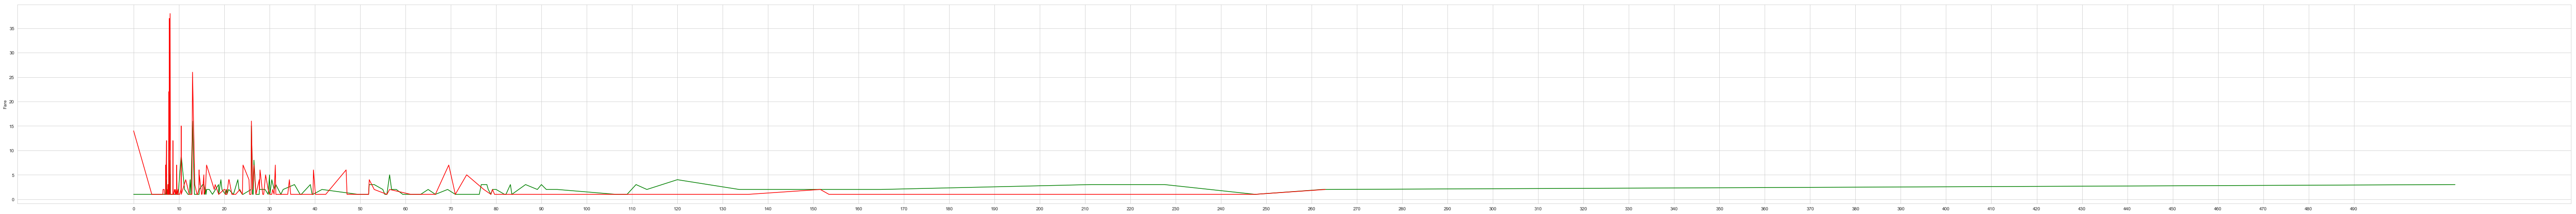

In [74]:
#Let's evaluate if we can delete fare, first, let's see relations with survived.
train_survived = df_train[df_train['Survived'] == 1]
train_died = df_train[df_train['Survived'] == 0]
plt.figure(figsize=(100,8))

# with the below plot, we can see that above 80 the amount of $$ paid is determinant for it.
sns.lineplot(x=train_survived['Fare'].value_counts().index, y=train_survived['Fare'].value_counts(), color='g')
sns.lineplot(x=train_died['Fare'].value_counts().index, y=train_died['Fare'].value_counts(), color='r')
plt.xticks(np.arange(0,500,10))

Text(0,0.5,'No Passengers')

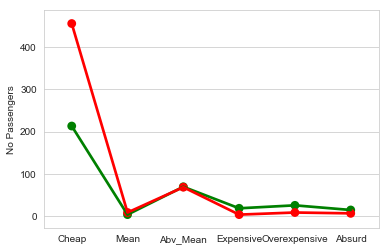

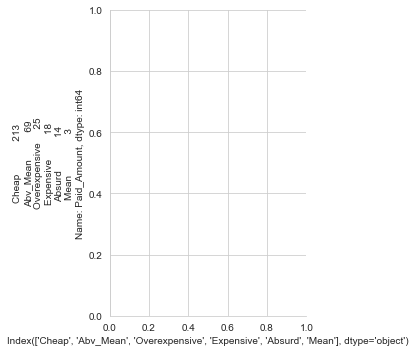

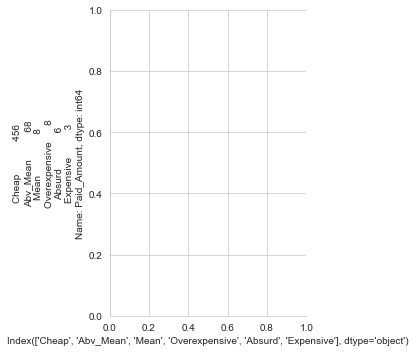

In [111]:
plt.figure(figsize=(12,8))
f, (ax1) = plt.subplots(1, 1, sharey=True, sharex=True)

sns.catplot(x=train_survived['Paid_Amount'].value_counts().index, y=train_survived['Paid_Amount'].value_counts(), data=train_survived,
            order=['Cheap', 'Mean', 'Abv_Mean', 'Expensive', 'Overexpensive', 'Absurd'], kind='point', alpha=0.5, color='g', ax=ax1, label='Survived')
sns.catplot(x=train_died['Paid_Amount'].value_counts().index, y=train_died['Paid_Amount'].value_counts(), data=train_survived,
            order=['Cheap', 'Mean', 'Abv_Mean', 'Expensive', 'Overexpensive', 'Absurd'], kind='point', alpha=0.5, color='r', ax=ax1, label='Died')
ax1.set_ylabel('No Passengers')

In [ ]:
# SibSp and Parch have very little impact, let's try to make it more meaningful
df_train['has_family'] = 0
df_test['has_family'] = 0

for index, row in df_train[(df_train['SibSp'] > 0) | (df_train['Parch'] > 0)].iterrows():
    df_train.loc[index, 'has_family'] = 1

for index, row in df_test[(df_test['SibSp'] > 0) | (df_test['Parch'] > 0)].iterrows():
    df_test.loc[index, 'has_family'] = 1
    
#Let's see if our effort had results
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(), annot=True)

In [ ]:
# Has family has 0.2 corr with survived a lot more comparing sibsp and parch.
# It makes sense, who had family onboard have better chances of survivability.
# Now, let's remove Parch and sibsp from our df's
df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
# Let's see our dataframes...
print(df_train.info())
print("//--------------//-----------//")
print(df_test.info())

In [ ]:
# Evaluating metrics to decide which metric to fill na's
# Let's make it concatenating both dataframes to have a greater sample
plt.figure(figsize=(12,6))
print(pd.concat([df_train, df_test])['Age'].describe())
plt.hist(pd.concat([df_train, df_test])[pd.isna(pd.concat([df_train, df_test])['Age']) == False]['Age'], bins=50)

In [ ]:
# We also have 2 missing values in Embarked.
# Let's see which is the most common embarked value.
sns.countplot(x='Embarked', data=df_train)

# The most common is 'S', then let's make it our value.
df_train['Embarked'].fillna('S', inplace=True)

In [ ]:
# one fare in testvalue is missing.
# Let's see the distribution to decide which metric we will use
concat_df = pd.concat([df_train, df_test])
plt.hist(concat_df[pd.isna(concat_df['Fare']) == False]['Fare'], bins=50)
concat_df['Fare'].describe()
df_test.fillna(concat_df['Fare'].mean(), inplace=True)

In [ ]:
#Converting values to integers.
df_train['Fare'] = df_train['Fare'].astype(int)
df_test['Fare'] = df_test['Fare'].astype(int)

df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [ ]:
df_train[df_train.index==760]

In [ ]:
def extract_title(complete_name):
    regex = re.compile('[A-Za-z]*, ([A-Za-z ]*). ')
    res = regex.search(complete_name)
    return res.group(1)

In [ ]:
# Drop the name column since probably doesn't impact on survivability
df_train['Title'] = df_train['Name'].apply(extract_title)
df_test['Title'] = df_test['Name'].apply(extract_title)

** Evaluating Pclass **

In [ ]:
# We know that Pclass has a great corr with survived.
# Let's get deep into it
prop_surv_cl1 = (df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)].shape[0] / df_train[df_train['Pclass'] == 1].shape[0])
prop_surv_cl2 = (df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)].shape[0] / df_train[df_train['Pclass'] == 2].shape[0])
prop_surv_cl3 = (df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)].shape[0] / df_train[df_train['Pclass'] == 3].shape[0])

In [ ]:
avg_surv_df = df_train[(df_train['Survived'] == 1)].shape[0] / df_train.shape[0]

In [ ]:
plt.figure(figsize=(12,6))
X=['Prop cl 1','Prop cl 2','Prop cl 3']
arr = [prop_surv_cl1, prop_surv_cl2, prop_surv_cl3]
sns.barplot(y=arr, x=X)
sns.pointplot(y=[avg_surv_df, avg_surv_df, avg_surv_df], x=X, color='r', markers='', linestyles='--')
# We can see that this is going to be a decisive parameter in our classification

** Evaluating Age **

In [ ]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

# There is a lot of people surviving under 16.
# Let's use this info in some way in the future.

** Evaluating Embarked **

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', hue='Survived', data=df_train)
# It seems that this feature also impacts in survivability

** Title evaluatuion **

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Title', hue='Survived', data=df_train)

In [ ]:
# Now we need to convert categorical fields...
# this is almost an one hot representation.

# First, let's put age in another form of representation
for index, row in df_train[df_train['Age'] <= 16].iterrows():
    df_train.loc[index, 'Sex'] = 'child'
    
for index, row in df_test[df_test['Age'] <= 16].iterrows():
    df_test.loc[index, 'Sex'] = 'child'

train_sex_dummies = pd.get_dummies(df_train['Sex'])
train_sex_dummies.columns = ['Child','Female','Male']
train_sex_dummies.drop(['Male'], axis=1, inplace=True)

test_sex_dummies = pd.get_dummies(df_test['Sex'])
test_sex_dummies.columns = ['Child','Female','Male']
test_sex_dummies.drop(['Male'], axis=1, inplace=True)

df_train.drop('Sex', axis=1, inplace=True)
df_test.drop('Sex', axis=1, inplace=True)

df_train = df_train.join(train_sex_dummies)
df_test = df_test.join(test_sex_dummies)

In [ ]:
train_class_dummies = pd.get_dummies(df_train['Pclass'], drop_first=True)
test_class_dummies = pd.get_dummies(df_test['Pclass'], drop_first=True)

train_class_dummies.rename(index=int, columns={2:'Class_2', 3:'Class_3'}, inplace=True)
test_class_dummies.rename(index=int, columns={2:'Class_2', 3:'Class_3'}, inplace=True)

df_train = df_train.join(train_class_dummies)
df_test = df_test.join(test_class_dummies)

df_train.drop('Pclass', axis=1, inplace=True)
df_test.drop('Pclass', axis=1, inplace=True)

In [ ]:
df_train.head()

In [ ]:
def fill_nonex_col(base, change):
    for val in base:
        if val not in change:
            change[val] = 0
    return change

In [ ]:
train_title_dummies = pd.get_dummies(df_train['Title'], drop_first=True)
test_title_dummies = pd.get_dummies(df_test['Title'], drop_first=True)

In [ ]:
train_title_dummies = fill_nonex_col(test_title_dummies, train_title_dummies)
test_title_dummies =  fill_nonex_col(train_title_dummies, test_title_dummies)

In [ ]:
df_train = df_train.join(train_title_dummies)
df_test = df_test.join(test_title_dummies)

df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_train.drop('Title', axis=1, inplace=True)
df_test.drop('Title', axis=1, inplace=True)

In [ ]:
train_emb_dummies = pd.get_dummies(df_train['Embarked'], drop_first=True)
test_emb_dummies = pd.get_dummies(df_test['Embarked'], drop_first=True)

train_emb_dummies.rename(index=int, columns={'Q':'Embarked_Q', 'S':'Embarked_S'}, inplace=True)
test_emb_dummies.rename(index=int, columns={'Q':'Embarked_Q', 'S':'Embarked_S'}, inplace=True)

df_train = df_train.join(train_emb_dummies)
df_test = df_test.join(test_emb_dummies)

df_train.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

In [ ]:
df_train.head()

In [ ]:
df_test.head()

# Model Build

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
parameters = {'n_estimators':(10, 100, 1000, 10000), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(rfc, parameters, verbose=3)
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

** Best Values: **
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       164
          1       0.77      0.68      0.72       104

avg / total       0.80      0.80      0.80       268


In [ ]:
pred = clf.predict(df_test)

In [ ]:
df_test['Survived'] = pred

In [ ]:
pred[0:5]

In [ ]:
with open('kggl_subm.csv', 'w') as file:
    file.write("PassengerId,Survived\n")
    for ind, row in df_test.iterrows():
        file.write(str(ind) + "," + str(row['Survived']) + '\n')